<a href="https://colab.research.google.com/github/wisrovi/SAM/blob/master/RedNeuronalArduino.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clases para Red Neuronal 

In [1]:
import numpy as np

class FuncionesTransferenciaRNA:
  def __init_(self):
    pass

  def sigmoid(self, x):
      return 1.0/(1.0 + np.exp(-x))

  def sigmoid_derivada(self, x):
      return sigmoid(x)*(1.0-sigmoid(x))

  def tanh(self, x):
      return np.tanh(x)

  def tanh_derivada(self, x):
      return 1.0 - x**2

# Creamos la clase 
class NeuralNetwork:

    def __init__(self, layers, activation='tanh'):
        ft = FuncionesTransferenciaRNA()

        if activation == 'sigmoid':
            self.activation = ft.sigmoid
            self.activation_prime = ft.sigmoid_derivada
        elif activation == 'tanh':
            self.activation = ft.tanh
            self.activation_prime = ft.tanh_derivada

        # inicializo los pesos
        self.weights = []
        self.deltas = []
        # capas = [2,3,4]
        # rando de pesos varia entre (-1,1)
        # asigno valores aleatorios a capa de entrada y capa oculta
        for i in range(1, len(layers) - 1):
            r = 2*np.random.random((layers[i-1] + 1, layers[i] + 1)) -1
            self.weights.append(r)
        # asigno aleatorios a capa de salida
        r = 2*np.random.random( (layers[i] + 1, layers[i+1])) - 1
        self.weights.append(r)

    def fit(self, X, y, learning_rate=0.2, epochs=100000):
        # Agrego columna de unos a las entradas X
        # Con esto agregamos la unidad de Bias a la capa de entrada
        ones = np.atleast_2d(np.ones(X.shape[0]))
        X = np.concatenate((ones.T, X), axis=1)
        
        for k in range(epochs):
            i = np.random.randint(X.shape[0])
            a = [X[i]]

            for l in range(len(self.weights)):
                    dot_value = np.dot(a[l], self.weights[l])
                    activation = self.activation(dot_value)
                    a.append(activation)
            # Calculo la diferencia en la capa de salida y el valor obtenido
            error = y[i] - a[-1]
            deltas = [error * self.activation_prime(a[-1])]
            
            # Empezamos en el segundo layer hasta el ultimo
            # (Una capa anterior a la de salida)
            for l in range(len(a) - 2, 0, -1): 
                deltas.append(deltas[-1].dot(self.weights[l].T)*self.activation_prime(a[l]))
            self.deltas.append(deltas)

            # invertir
            # [level3(output)->level2(hidden)]  => [level2(hidden)->level3(output)]
            deltas.reverse()

            # backpropagation
            # 1. Multiplcar los delta de salida con las activaciones de entrada 
            #    para obtener el gradiente del peso.
            # 2. actualizo el peso restandole un porcentaje del gradiente
            for i in range(len(self.weights)):
                layer = np.atleast_2d(a[i])
                delta = np.atleast_2d(deltas[i])
                self.weights[i] += learning_rate * layer.T.dot(delta)

            if k % 10000 == 0: print('epochs:', k)

    def predict(self, x): 
        ones = np.atleast_2d(np.ones(x.shape[0]))
        a = np.concatenate((np.ones(1).T, np.array(x)), axis=0)
        for l in range(0, len(self.weights)):
            a = self.activation(np.dot(a, self.weights[l]))
        return a

    def print_weights(self):
        print("LISTADO PESOS DE CONEXIONES")
        for i in range(len(self.weights)):
            print(self.weights[i])

    def get_weights(self):
        return self.weights
    
    def get_deltas(self):
        return self.deltas




# Configuro el modelo de Red Neuronal

In [2]:
nn = NeuralNetwork([2,3,2],activation ='tanh')

# Configuro entradas y salidas

In [3]:
X = np.array([[0, 0],   # sin obstaculos
              [0, 1],   # sin obstaculos
              [0, -1],  # sin obstaculos
              [0.5, 1], # obstaculo detectado a derecha
              [0.5,-1], # obstaculo a izq
              [1,1],    # demasiado cerca a derecha
              [1,-1]])  # demasiado cerca a izq
 
y = np.array([[0,1],    # avanzar
              [0,1],    # avanzar
              [0,1],    # avanzar
              [-1,1],   # giro izquierda
              [1,1],    # giro derecha
              [0,-1],   # retroceder
              [0,-1]])  # retroceder

# Entrenar el modelo

In [4]:
nn.fit(X, y, learning_rate=0.03,epochs=15001)

epochs: 0
epochs: 10000


Para predecir uso: nn.predict(e) # e = entrada evaluar

# Probar modelo

In [5]:
index=0
for e in X:
    print("X:",e,"y:",y[index],"Network:",nn.predict(e))
    index=index+1

X: [0. 0.] y: [0 1] Network: [0.00148989 0.99998193]
X: [0. 1.] y: [0 1] Network: [-0.00194697  0.99976795]
X: [ 0. -1.] y: [0 1] Network: [0.00647974 0.9999772 ]
X: [0.5 1. ] y: [-1  1] Network: [-0.96226402  0.96191027]
X: [ 0.5 -1. ] y: [1 1] Network: [0.91613906 0.94358299]
X: [1. 1.] y: [ 0 -1] Network: [-0.00183371 -0.9944676 ]
X: [ 1. -1.] y: [ 0 -1] Network: [ 0.00741186 -0.94792693]


# obtener deltas (comparación aprendizaje y error)

In [6]:
deltas = nn.get_deltas()
deltas

[[array([-0.50409601, -0.04886539,  0.04549768, -0.03191655]),
  array([0.30605003, 0.58745623])],
 [array([ 0.47216473,  0.09700378, -0.29186547, -0.11279156]),
  array([ 0.04897039, -1.18428987])],
 [array([-0.49064186, -0.03378583,  0.0464845 , -0.03212477]),
  array([0.31789477, 0.5538509 ])],
 [array([-0.56644289, -0.0658404 ,  0.11363389, -0.18386932]),
  array([0.33471094, 0.69073182])],
 [array([-0.80783295,  0.05533412, -0.01925038, -0.11738883]),
  array([0.86574675, 0.41823764])],
 [array([ 0.20719773,  0.10188154, -0.34337234, -0.09119429]),
  array([ 0.38489591, -1.10952137])],
 [array([-0.87421441,  0.05610764, -0.01500393, -0.12870979]),
  array([0.95584216, 0.44209876])],
 [array([-0.48437113, -0.02510266,  0.04311153, -0.0358668 ]),
  array([0.37387675, 0.45992337])],
 [array([-0.5179848 , -0.03884972,  0.07124754, -0.10186018]),
  array([0.38403783, 0.5116408 ])],
 [array([-0.48795682, -0.08926701,  0.13494301, -0.10847696]),
  array([0.26691415, 0.6286964 ])],
 [arra

# Graficar Deltas

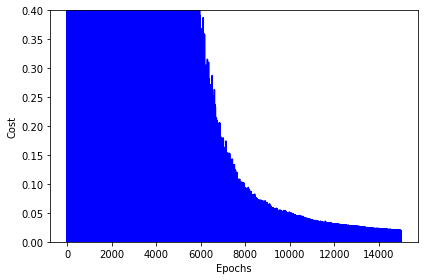

In [7]:
import matplotlib.pyplot as plt

valores=[]
index=0
for arreglo in deltas:
    valores.append(arreglo[1][0] + arreglo[1][1])
    index=index+1

plt.plot(range(len(valores)), valores, color='b')
plt.ylim([0, 0.4])
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.tight_layout()
plt.show()

# Obtener vectores de Pesos

In [8]:
def to_str(name, W):
    s = str(W.tolist()).replace('[', '{').replace(']', '}')
    return 'float '+name+'['+str(W.shape[0])+']['+str(W.shape[1])+'] = ' + s + ';'

In [9]:
# Obtenermos los pesos entrenados para poder usarlos en el codigo de arduino
pesos = nn.get_weights();

print('// Reemplazar estas lineas en tu codigo arduino:')
print('// float HiddenWeights ...')
print('// float OutputWeights ...')
print('// Con lo pesos entrenados.')
print('\n')
print(to_str('HiddenWeights', pesos[0]))
print(to_str('OutputWeights', pesos[1]))

// Reemplazar estas lineas en tu codigo arduino:
// float HiddenWeights ...
// float OutputWeights ...
// Con lo pesos entrenados.


float HiddenWeights[3][4] = {{-1.510949916363387, -0.7578131273750038, 1.8780424169936192, 1.072503183227312}, {3.09388922160945, -0.900038546588605, -3.140887339997693, -0.5302749955270301}, {0.925341847815198, -0.26642684542757805, 0.5958905992431679, -1.011711090328305}};
float OutputWeights[4][2] = {{-2.2091612570714925, -1.0821285949530552}, {-0.7441347143079569, -0.7457079855360854}, {-1.6977378627032047, 3.343622127555712}, {-1.085982631082158, 1.4647110901327611}};
